### ***Package used for project***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ***Create Object Oriented Progamming***



In [4]:
class BollingerBandInvestment:
    def __init__(self, data, budget, window=20, num_std=2):
        self.data = data
        self.budget = budget
        self.window = window
        self.num_std = num_std
        self.profit = 0

    def calculate_bollinger_bands(self):
        rolling_mean = self.data['Close'].rolling(window=self.window).mean()
        rolling_std = self.data['Close'].rolling(window=self.window).std()

        self.data['Middle Band'] = rolling_mean
        self.data['Upper Band'] = rolling_mean + (rolling_std * self.num_std)
        self.data['Lower Band'] = rolling_mean - (rolling_std * self.num_std)

    def generate_signals(self):
        self.data['Signal'] = 0
        self.data['Signal'][self.window:] = np.where(
            self.data['Close'][self.window:] < self.data['Lower Band'][self.window:], 1, 
            np.where(self.data['Close'][self.window:] > self.data['Upper Band'][self.window:], -1, 0)
        )

    def calculate_profit(self):
        position = 0
        for i in range(len(self.data)):
            if self.data['Signal'][i] == 1 and position == 0:
                position = self.budget // self.data['Close'][i]
                self.budget -= position * self.data['Close'][i]
            elif self.data['Signal'][i] == -1 and position > 0:
                self.budget += position * self.data['Close'][i]
                self.profit += (self.data['Close'][i] - self.data['Close'][i-1]) * position
                position = 0

        change_rate = (self.profit / (self.budget + self.profit)) * 100
        return self.profit, change_rate

    def plot_data(self):
        plt.figure(figsize=(12, 8))
        plt.plot(self.data['Close'], label='Close Price')
        plt.plot(self.data['Middle Band'], label='Middle Band')
        plt.plot(self.data['Upper Band'], label='Upper Band')
        plt.plot(self.data['Lower Band'], label='Lower Band')
        
        buy_signals = self.data[self.data['Signal'] == 1]
        sell_signals = self.data[self.data['Signal'] == -1]
        
        plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal')
        plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal')

        plt.legend()
        plt.show()

    def print_trade_signals(self):
        buy_signals = self.data[self.data['Signal'] == 1]
        sell_signals = self.data[self.data['Signal'] == -1]

        print("Buy Signals:")
        for date, row in buy_signals.iterrows():
            print(f"Date: {date}, Price: {row['Close']}")

        print("\nSell Signals:")
        for date, row in sell_signals.iterrows():
            print(f"Date: {date}, Price: {row['Close']}")

### ***TEST RUN***


C:\Users\MSI\AppData\Local\Temp\ipykernel_30464\3751619052.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.data['Signal'][self.window:] = np.where(
C:\Users\MSI\AppData\Local\Temp\ipykernel_30464\3751619052.py:19: SettingWithCopyWa

Total profit: 1402.5653839111328
Change rate: 94.83%
Buy Signals:
Date: 2024-06-02 23:15:00-04:00, Price: 77.20999908447266
Date: 2024-06-02 23:20:00-04:00, Price: 77.06999969482422
Date: 2024-06-02 23:25:00-04:00, Price: 76.93000030517578
Date: 2024-06-02 23:30:00-04:00, Price: 76.95999908447266
Date: 2024-06-03 01:00:00-04:00, Price: 76.87999725341797
Date: 2024-06-03 01:30:00-04:00, Price: 76.87000274658203
Date: 2024-06-03 01:35:00-04:00, Price: 76.79000091552734
Date: 2024-06-03 01:40:00-04:00, Price: 76.77999877929688
Date: 2024-06-03 01:45:00-04:00, Price: 76.73999786376953
Date: 2024-06-03 05:45:00-04:00, Price: 76.88999938964844
Date: 2024-06-03 05:50:00-04:00, Price: 76.87999725341797
Date: 2024-06-03 05:55:00-04:00, Price: 76.81999969482422
Date: 2024-06-03 06:00:00-04:00, Price: 76.79000091552734
Date: 2024-06-03 08:45:00-04:00, Price: 76.76000213623047
Date: 2024-06-03 08:50:00-04:00, Price: 76.68000030517578
Date: 2024-06-03 09:20:00-04:00, Price: 76.38999938964844
Date: 

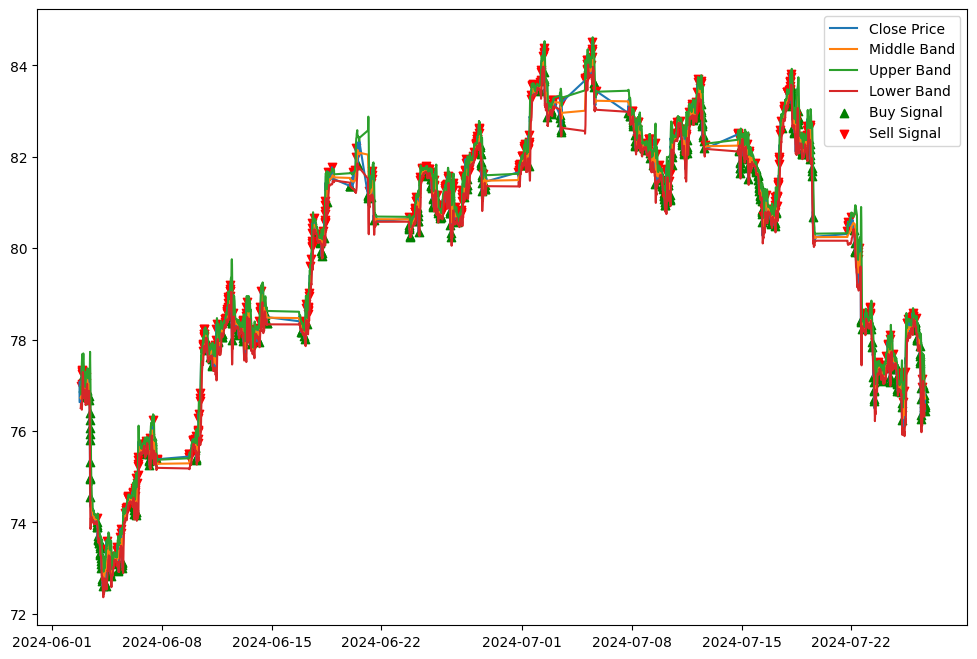

In [5]:
if __name__ == "__main__":
    # Giả sử dữ liệu 'data' là một DataFrame chứa các cột 'Datetime' và 'Close'
    data = pd.read_csv("OIL_5m.csv", parse_dates=['Datetime'], index_col='Datetime')

    bollinger_investment = BollingerBandInvestment(data=data, budget=10000)
    bollinger_investment.calculate_bollinger_bands()
    bollinger_investment.generate_signals()
    profit, change_rate = bollinger_investment.calculate_profit()
    print(f"Total profit: {profit}")
    print(f"Change rate: {change_rate:.2f}%")
    bollinger_investment.print_trade_signals()
    bollinger_investment.plot_data()